In [50]:
%matplotlib widget

In [51]:
from pythtb import * # import TB model class
import matplotlib
#matplotlib.use('widget')

import matplotlib.pyplot as plt
import numpy as np

In [52]:
# read output from Wannier90 that should be in this folder
agp2=w90(r"./",r"AgP2_phononTB")

my_model=agp2.model(min_hopping_norm=0.01) #build model

----- k_path report begin ----------
real-space lattice vectors
 [[ 6.13653  0.       0.     ]
 [ 0.       5.0147   0.     ]
 [-3.10798  0.       7.09754]]
k-space metric tensor
 [[0.03165 0.      0.01005]
 [0.      0.03977 0.     ]
 [0.01005 0.      0.01985]]
internal coordinates of nodes
 [[0.5 0.5 0.5]
 [0.5 0.  0.5]
 [0.  0.  0. ]
 [0.  0.  0.5]
 [0.  0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]]
reciprocal-space lattice vectors
 [[0.16296 0.      0.07136]
 [0.      0.19941 0.     ]
 [0.      0.      0.14089]]
cartesian coordinates of nodes
 [[0.08148 0.09971 0.10613]
 [0.08148 0.      0.10613]
 [0.      0.      0.     ]
 [0.      0.      0.07045]
 [0.      0.09971 0.07045]
 [0.08148 0.09971 0.03568]
 [0.      0.09971 0.     ]
 [0.      0.      0.     ]
 [0.08148 0.      0.03568]
 [0.08148 0.09971 0.03568]
 [0.08148 0.09971 0.10613]]
list of segments:
  length = 0.09971  from  [0.5 0.5 0.5]  to  [0.5 0.  0.5]
  length =  0.1338 

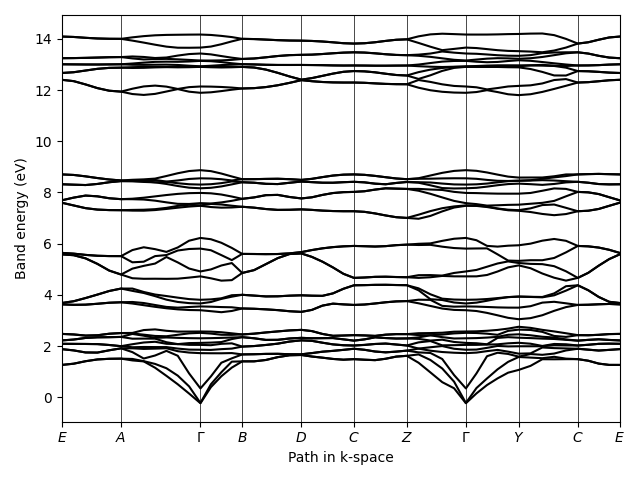

In [64]:
# solve model on a path and plot it
path=[[0.5,0.5,0.5],[0.5,0.0, 0.5],[0.0,0.0,0.0], [0.0,0.0,0.5], [0.0, 0.5, 0.5], [0.5,0.5,0.0], [0.0, 0.5, 0.0],[0.0,0.0,0.0], [0.5, 0.0, 0.0],[0.5,0.5,0.0], [0.5, 0.5, 0.5]]
# labels of the nodes
k_label=(r'$E$', r'$A$', r'$\Gamma$',r'$B$', r'$D$',r'$C$', r'$Z$', r'$\Gamma$', r'$Y$',r'$C$', r'$E$')
# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,51)
#
evals, evecs=my_model.solve_all(k_vec, eig_vectors=True)
fig, ax = plt.subplots()
for i in range(evals.shape[0]):
    ax.plot(k_dist,np.sign(evals[i])*abs(evals[i])**0.5,"k-")
for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy (eV)")
ax.set_xlim(k_dist[0],k_dist[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
fig.tight_layout()

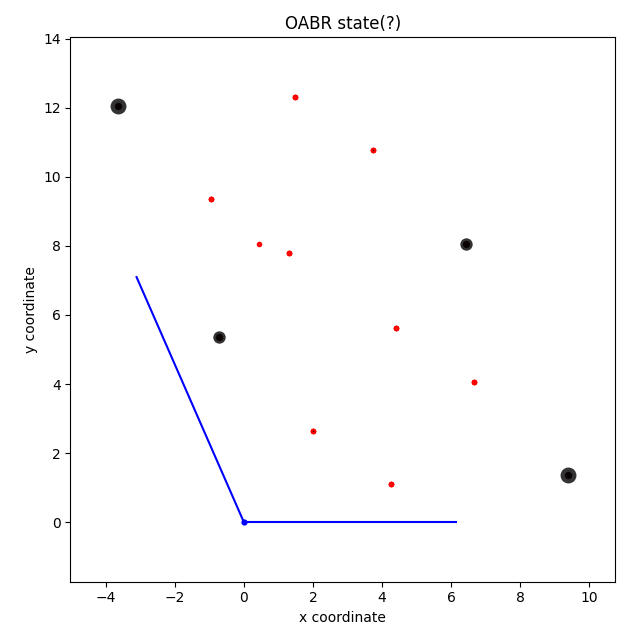

In [54]:
#draw a given mode
mode = 9
(fig2,ax2)=my_model.visualize(0,2,eig_dr=evecs[mode,0,:],draw_hoppings=False)
ax2.set_title("OABR state(?)")
ax2.set_xlabel("x coordinate")
ax2.set_ylabel("y coordinate")
fig2.tight_layout()

In [55]:



# cutout finite model first along direction z with PBC along x and y, repeat unit cell 4 times
finite_model=my_model.cut_piece(1,2,glue_edgs=False)
print('cut')
#now cut repeat the cell along x and y #THIS TAKES FIFTEEN FUCKING MINUTES WHO TF PROGRAMMED PYTHTB
#finite_model = finite_model.make_supercell([[2,0,0],[0,2,0],[0,0,1]])
finite_model = finite_model.cut_piece(4,0, glue_edgs=True)
finite_model = finite_model.cut_piece(4,1, glue_edgs=True)

cut


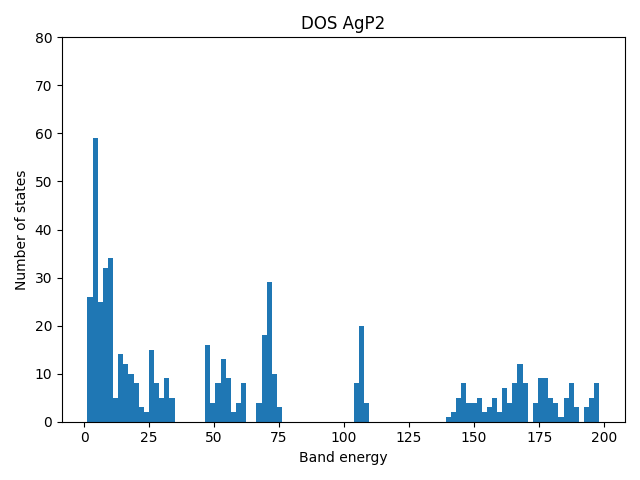

In [62]:

evals_true=finite_model.solve_all()
evals_true=evals_true.flatten()

# now plot density of states
fig, ax = plt.subplots()
ax.hist(evals_true,100)#,range=(-4.,4.))
ax.set_ylim(0.0,80.0)
ax.set_title("DOS AgP2")
ax.set_xlabel("Band energy")
ax.set_ylabel("Number of states")
fig.tight_layout()

In [43]:
# solve model on a path and plot it
pathf=[[0,0],[0.5,0.0],[0.5,0.5], [0.0,0.5], [0.0, 0.0], [0.5,0.5]]
# labels of the nodes
k_labelf=(r'$\Gamma$', r'$X$', r'$M$',r'$Y$', r'$\Gamma$',r'$M$')
# call function k_path to construct the actual path
(k_vecf,k_distf,k_nodef)=finite_model.k_path(pathf,51)

----- k_path report begin ----------
real-space lattice vectors
 [[6.13653 0.      0.     ]
 [0.      5.0147  0.     ]]
k-space metric tensor
 [[0.02656 0.     ]
 [0.      0.03977]]
internal coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0.5]
 [0.  0. ]
 [0.5 0.5]]
list of segments:
  length = 0.08148  from  [0. 0.]  to  [0.5 0. ]
  length = 0.09971  from  [0.5 0. ]  to  [0.5 0.5]
  length = 0.08148  from  [0.5 0.5]  to  [0.  0.5]
  length = 0.09971  from  [0.  0.5]  to  [0. 0.]
  length = 0.12876  from  [0. 0.]  to  [0.5 0.5]
node distance list: [0.      0.08148 0.18119 0.26267 0.36237 0.49114]
node index list:    [ 0  8 18 27 37 50]
----- k_path report end ------------



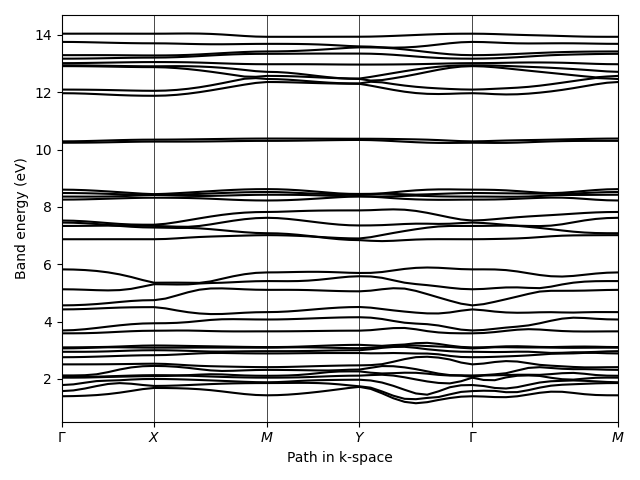

In [44]:
evalsf, evecsf=finite_model.solve_all(k_vecf, eig_vectors=True)
fig, ax = plt.subplots()
for i in range(evals.shape[0]):
    ax.plot(k_distf,np.sign(evalsf[i])*abs(evalsf[i])**0.5,"k-")
for n in range(len(k_nodef)):
    ax.axvline(x=k_nodef[n],linewidth=0.5, color='k')
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy (eV)")
ax.set_xlim(k_distf[0],k_distf[-1])
ax.set_xticks(k_nodef)
ax.set_xticklabels(k_labelf)
fig.tight_layout()

In [56]:
# solve finite model at gamma
(evalsf0,evecsf0)=finite_model.solve_one(eig_vectors=True)

In [57]:
for i,e in enumerate(evalsf0):
    print(i,e)

0 1.3173759899019448
1 1.3173759899019453
2 1.662290794924445
3 1.6622907949244718
4 1.9359147207784546
5 2.028994437745511
6 2.1519126793912
7 2.1519126793912022
8 2.2168516086938093
9 2.2168516086938244
10 2.2846792808612864
11 2.284679280861291
12 2.3293190782820363
13 2.329319078282051
14 2.3598625029045555
15 2.3598625029045555
16 2.4693476530033456
17 2.573826869425395
18 2.5738268694254427
19 2.8248645514606863
20 2.954091338939529
21 2.994196788626683
22 2.9941967886266974
23 3.0219948880611582
24 3.0662772867233277
25 3.1785387092208515
26 3.2970984808350945
27 3.2970984808351007
28 3.311457641533345
29 3.3114576415333516
30 3.4307525833384678
31 3.4430152506945877
32 3.4430152506945895
33 3.4582126223200453
34 3.4582126223200547
35 3.5309990003646883
36 3.602330164879301
37 3.602330164879302
38 3.7547710434274157
39 3.754771043427432
40 3.7799573169442446
41 3.779957316944247
42 3.7872909185236048
43 3.7872909185236088
44 3.8728427927331794
45 3.914611103539082
46 3.914611103

In [58]:
#Edge mode
edgemode = 400

print(finite_model.get_lat())


[[ 6.13652817  0.          0.        ]
 [ 0.          5.01469891  0.        ]
 [-3.10797897  0.          7.09753739]]


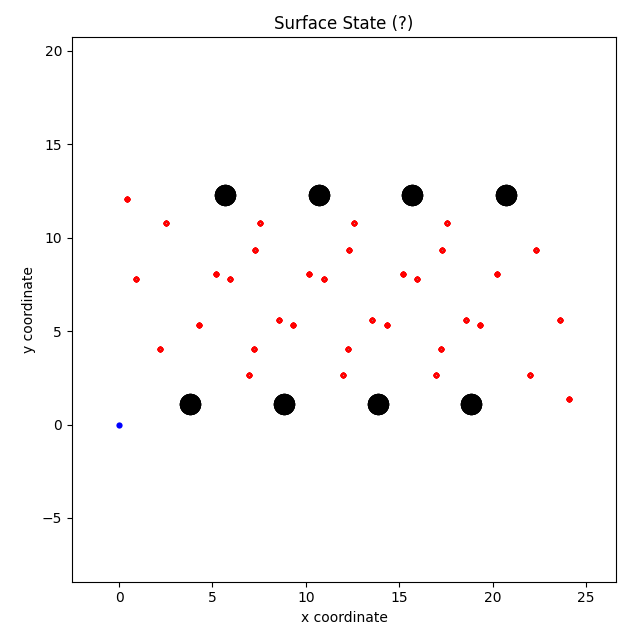

In [59]:
#Draw the surface mode


(fig3,ax3)=finite_model.visualize(1,2,eig_dr=evecsf0[edgemode,:],draw_hoppings=False)

ax3.set_title("Surface State (?)")
ax3.set_xlabel("x coordinate")
ax3.set_ylabel("y coordinate")
fig3.tight_layout()



In [63]:
#save for animating
mode2save = evecsf0[edgemode,:]
np.savetxt('surfacemode441.txt',mode2save)

coords = finite_model.get_orb()
for i in range(len(coords)):
    coords[i] = np.dot(coords[i],finite_model.get_lat())
np.savetxt('positions441.txt',coords)